# 1. Basic Analysis of the Data
## 1.1 Data Description

In [37]:
import pandas as pd
df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv')
print(df.describe())


        Attention      NumFix    AvgFixDur    NumBlink   AvgBlinkDur  \
count  960.000000  960.000000   960.000000  960.000000    960.000000   
mean     0.572917   58.562500   294.337240   14.836458    489.400072   
std      0.494912   20.009129    97.181563    9.339240   1881.966131   
min      0.000000    0.000000     0.000000    0.000000      0.000000   
25%      0.000000   51.000000   240.193713    8.000000    144.404762   
50%      1.000000   63.000000   284.095713   13.000000    197.976190   
75%      1.000000   72.000000   342.726950   20.000000    297.777778   
max      1.000000   95.000000  1083.333333   47.000000  30000.000000   

        AvgPupDia   VarPupDia  OffStimFram   AvgSacAmp  AvgFixDisp  \
count  957.000000  957.000000   960.000000  960.000000  960.000000   
mean     3.625744    0.184662    25.253125    5.903661    0.199369   
std      0.612144    0.154084    43.137019    1.718801    0.052169   
min      1.736582    0.000000     0.000000    0.000000    0.000000   
2

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv')

# Calculate the percentage of Attention==0 for each Stimuli
attention_percentage = df.groupby('Stimuli')['Attention'].apply(lambda x: (x == 1).mean() * 100).reset_index()

# Sort the data for better visualization
attention_percentage = attention_percentage.sort_values(by='Attention', ascending=False)
# Plot the bar plot
mean_attention_0 = attention_percentage['Attention'].mean()
std_attention_0 = attention_percentage['Attention'].std()

print(attention_percentage, sep='\n')
print(f"Avg: {mean_attention_0}, Std: {std_attention_0}")

        Stimuli  Attention
4    HongKong_1       67.5
6       India_1       67.5
19  Singapore_3       65.0
23    Vietnam_2       62.5
21     Sweden_4       62.5
20     Sweden_2       62.5
15        NYC_4       62.5
13     Mexico_3       60.0
10     London_1       60.0
14        NYC_1       60.0
1      Brazil_3       60.0
7       India_3       57.5
17     Russia_3       55.0
0      Brazil_1       55.0
11     London_3       55.0
8       Italy_1       55.0
3      France_3       55.0
12     Mexico_1       55.0
16     Russia_1       52.5
18  Singapore_1       52.5
5    HongKong_3       50.0
2      France_1       50.0
22    Vietnam_1       47.5
9       Italy_4       45.0
Avg: 57.291666666666664, Std: 6.030568267019982


**画像によって極端な差があるかどうか確認**

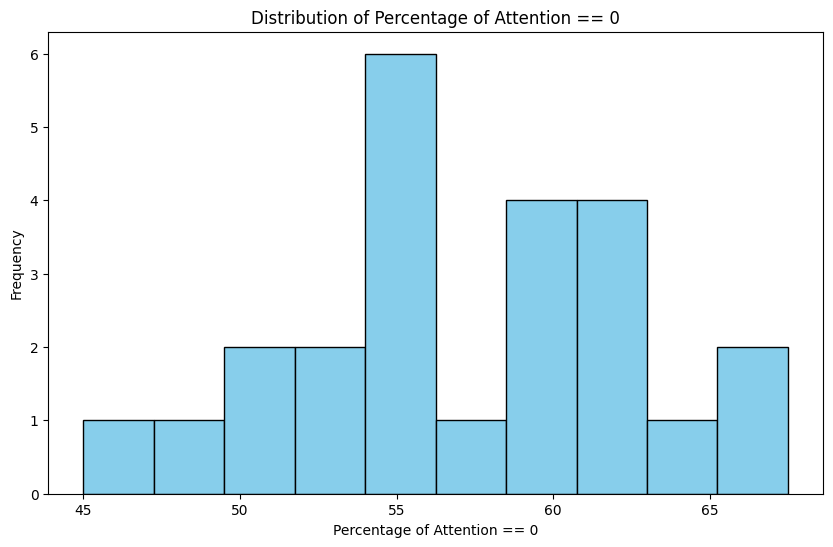

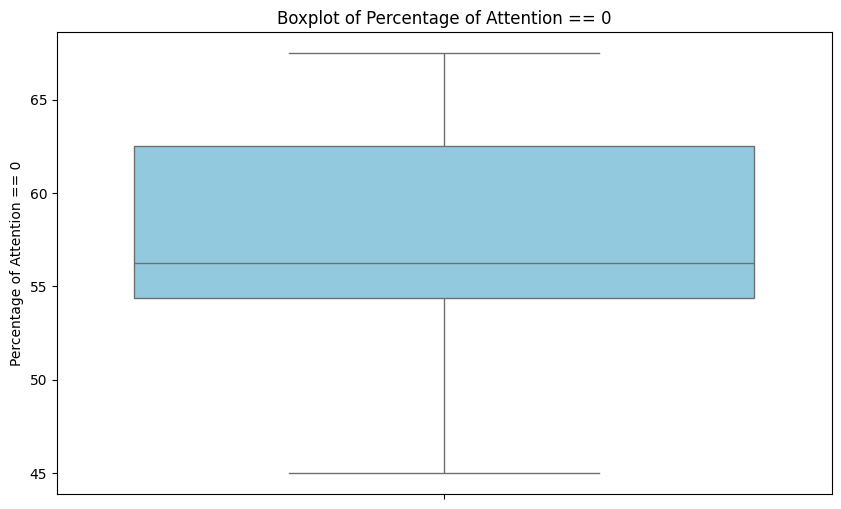

F-value: 0.59
p-value: 0.94


In [17]:
# 1. 分布の確認
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv')

# Calculate the percentage of Attention==0 for each Stimuli
attention_percentage = df.groupby('Stimuli')['Attention'].apply(lambda x: (x == 1).mean() * 100).reset_index()

# Sort the data for better visualization
attention_percentage_sorted = attention_percentage.sort_values(by='Attention', ascending=False)
# ヒストグラム
plt.figure(figsize=(10, 6))
plt.hist(attention_percentage_sorted['Attention'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Percentage of Attention == 0')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage of Attention == 0')
plt.show()

# 箱ひげ図
plt.figure(figsize=(10, 6))
sns.boxplot(y=attention_percentage_sorted['Attention'], color='skyblue')
plt.ylabel('Percentage of Attention == 0')
plt.title('Boxplot of Percentage of Attention == 0')
plt.show()

import scipy.stats as stats

# ANOVA検定を実施
f_value, p_value = stats.f_oneway(
    *[df[df['Stimuli'] == stimuli]['Attention'] for stimuli in df['Stimuli'].unique()]
)

print(f'F-value: {f_value:.2f}')
print(f'p-value: {p_value:.2f}')


p値が0.94と非常に高いため、画像間でAttentionが0の割合に有意な差があるとは言えません。この結果から、画像によって集中度に極端な差があるとは統計的には結論づけられません。

## 1.2 Proportion of Attention Distribution Among Participants

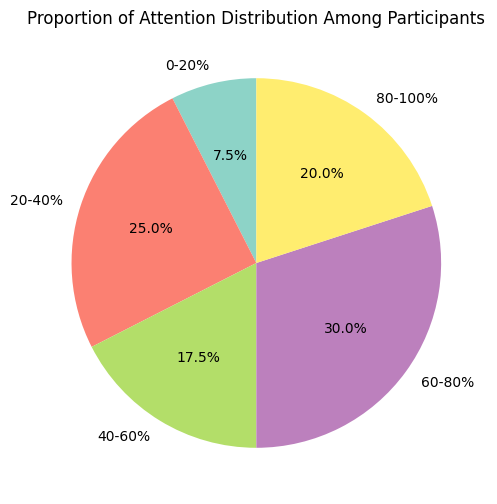

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv')

# Calculate the proportion of attention == 1 for each participant
attention_proportion = df.groupby('Participant')['Attention'].mean()

# Define bins for the categories
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ["0-20%", "20-40%", "40-60%", "60-80%", "80-100%"]

# Categorize the proportions into the bins
categories = pd.cut(attention_proportion, bins, labels=labels, include_lowest=True, ordered=True)

# Count the number of participants in each bin
category_counts = categories.value_counts(sort=False)
category_counts_normalized = category_counts / category_counts.sum()

# Plotting
plt.figure(figsize=(10, 6))
category_counts_normalized.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap="Set3", labels=labels)
plt.ylabel('')  # Remove the y-label as it is unnecessary for pie charts
plt.title('Proportion of Attention Distribution Among Participants')
plt.show()


# 2. Identify the best window size using the random forest model

- Cross-validation: Instead of a single train-test split for each iteration, consider using cross-validation. This will provide a more robust measure of model performance as it evaluates the model on multiple train-test splits. You can use cross_val_score for this, but note that it requires splitting the data such that each participant's data is entirely in either the training or the testing set, which might require custom splitting strategies.

- Feature Importance and Selection: Depending on the results and the importance of different features, you might consider feature selection or engineering to improve model performance. RandomForest provides feature importance scores that can help you understand which features are most influential in making predictions.

- Parameter Tuning: You're using the default parameters of RandomForestClassifier. Consider tuning the hyperparameters, like n_estimators, max_depth, etc., using techniques such as grid search or random search to potentially improve model accuracy.

- Validation Strategy: The approach to split data by participants is excellent for ensuring that the model generalizes well over different individuals. However, make sure that your way of splitting truly reflects the independent data distributions you expect to encounter in practice.

- Error Analysis: After determining the best window size, it might be useful to perform an error analysis to see where the model performs poorly. This could provide insights into further improvements in feature engineering or model choice.

- Model Complexity: Evaluate if RandomForest is the best choice or if other models (e.g., SVM, logistic regression, or even neural networks) might yield better results for your specific type of data and problem.

**Cross Validation Implementation:**

In [8]:
import pandas as pd
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load CSV files into DataFrames
window_sizes = [5 * i for i in range(1, 9)]
dataframes = [pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{w}sec.csv") for w in window_sizes]

# Function to prepare data by participant
def prepare_data(df):
    X = df[['NumFix', 'AvgFixDur', 'NumBlink', 'AvgBlinkDur', 'AvgPupDia', 'VarPupDia', 'OffStimFram', 'AvgSacAmp', 'AvgFixDisp', 'LastFixDur', 'LastFixDurDiff']]
    y = df['Attention']
    groups = df['Participant']
    return X, y, groups

# Number of iterations and random states
iterations = 10
random_states = range(iterations)

# Loop through each DataFrame and random states
results = {w: [] for w in window_sizes}
for w, df in zip(window_sizes, dataframes):
    X, y, groups = prepare_data(df)
    # Define the cross-validation strategy
    gkf = GroupKFold(n_splits=5)
    
    # Collect cross-validation scores for each random state
    model_scores = []
    for random_state in random_states:
        clf = RandomForestClassifier(random_state=random_state)
        scores = cross_val_score(clf, X, y, groups=groups, cv=gkf)
        model_scores.extend(scores)

    # Store average accuracy for this window across all random states
    results[w].append(np.mean(model_scores))

# Calculate average accuracy for each window size
average_results = {w: np.mean(acc) for w, acc in results.items()}

# Print results
for w, avg_acc in average_results.items():
    print(f"Window size: {w} sec, Average accuracy: {avg_acc:.3f}")

# Find the best window size
best_window = max(average_results, key=average_results.get)
print(f"Best window size: {best_window} sec with average accuracy: {average_results[best_window]:.3f}")


Window size: 5 sec, Average accuracy: 0.529
Window size: 10 sec, Average accuracy: 0.542
Window size: 15 sec, Average accuracy: 0.581
Window size: 20 sec, Average accuracy: 0.585
Window size: 25 sec, Average accuracy: 0.606
Window size: 30 sec, Average accuracy: 0.612
Window size: 35 sec, Average accuracy: 0.619
Window size: 40 sec, Average accuracy: 0.613
Best window size: 35 sec with average accuracy: 0.619


**Add a blacklist to filter out the participants with missing data.**

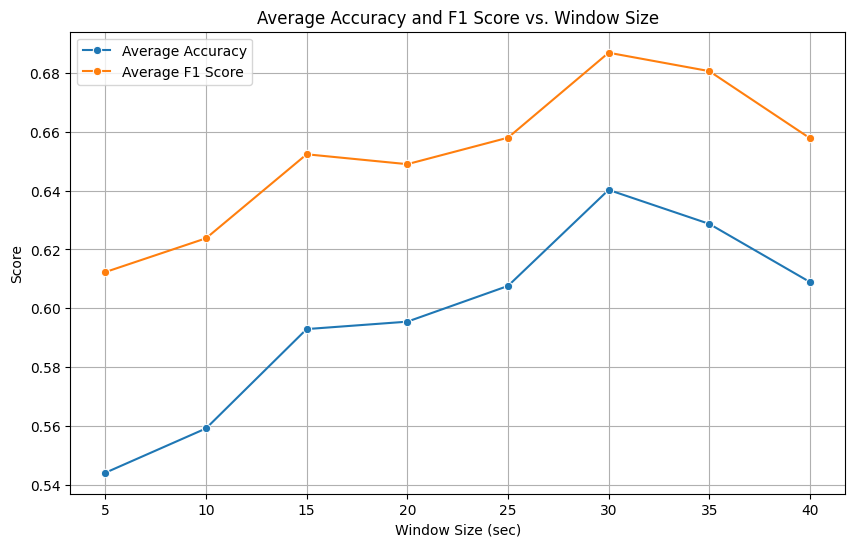

Window size: 5 sec, Average accuracy: 0.544, Average F1 score: 0.612
Window size: 10 sec, Average accuracy: 0.559, Average F1 score: 0.624
Window size: 15 sec, Average accuracy: 0.593, Average F1 score: 0.652
Window size: 20 sec, Average accuracy: 0.595, Average F1 score: 0.649
Window size: 25 sec, Average accuracy: 0.608, Average F1 score: 0.658
Window size: 30 sec, Average accuracy: 0.640, Average F1 score: 0.687
Window size: 35 sec, Average accuracy: 0.629, Average F1 score: 0.681
Window size: 40 sec, Average accuracy: 0.609, Average F1 score: 0.658
Best window size (accuracy): 30 sec with average accuracy: 0.640
Best window size (F1 score): 30 sec with average F1 score: 0.687


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

# Load CSV files into DataFrames
window_sizes = [5 * i for i in range(1, 9)]
dataframes = [pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{w}sec.csv") for w in window_sizes]

# Blacklist of participants with missing data
blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]

# Function to prepare data by participant, excluding blacklist
def prepare_data(df):
    df_filtered = df[~df['Participant'].isin(blacklist)]
    X = df_filtered[['NumFix', 'AvgFixDur', 'NumBlink', 'AvgBlinkDur', 'AvgPupDia', 'VarPupDia', 'OffStimFram', 'AvgSacAmp', 'AvgFixDisp', 'LastFixDur', 'LastFixDurDiff']]
    # X = df_filtered[['NumFix', 'AvgFixDisp']]
    y = df_filtered['Attention']
    groups = df_filtered['Participant']
    return X, y, groups

# Number of iterations and random states
iterations = 10
random_states = range(iterations)

# Loop through each DataFrame and random states
results = {w: {'accuracy': [], 'f1_score': []} for w in window_sizes}
for w, df in zip(window_sizes, dataframes):
    X, y, groups = prepare_data(df)
    # Define the cross-validation strategy
    gkf = GroupKFold(n_splits=5)
    
    # Collect cross-validation scores for each random state
    for random_state in random_states:
        clf = RandomForestClassifier(random_state=random_state)
        accuracy_scores = cross_val_score(clf, X, y, groups=groups, cv=gkf)
        f1_scorer = make_scorer(f1_score)
        f1_scores = cross_val_score(clf, X, y, groups=groups, cv=gkf, scoring=f1_scorer)
        results[w]['accuracy'].extend(accuracy_scores)
        results[w]['f1_score'].extend(f1_scores)

# Calculate average accuracy and F1 score for each window size
average_results = {w: {'average_accuracy': np.mean(scores['accuracy']), 'average_f1_score': np.mean(scores['f1_score'])} for w, scores in results.items()}

# Convert average_results to a DataFrame for plotting
average_results_df = pd.DataFrame.from_dict(average_results, orient='index').reset_index()
average_results_df.columns = ['window_size', 'average_accuracy', 'average_f1_score']

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='window_size', y='average_accuracy', data=average_results_df, marker='o', label='Average Accuracy')
sns.lineplot(x='window_size', y='average_f1_score', data=average_results_df, marker='o', label='Average F1 Score')
plt.xlabel('Window Size (sec)')
plt.ylabel('Score')
plt.title('Average Accuracy and F1 Score vs. Window Size')
plt.legend()
plt.grid(True)
plt.show()

# Print results
for w, metrics in average_results.items():
    print(f"Window size: {w} sec, Average accuracy: {metrics['average_accuracy']:.3f}, Average F1 score: {metrics['average_f1_score']:.3f}")

# Find the best window size based on accuracy
best_window_accuracy = max(average_results, key=lambda w: average_results[w]['average_accuracy'])
print(f"Best window size (accuracy): {best_window_accuracy} sec with average accuracy: {average_results[best_window_accuracy]['average_accuracy']:.3f}")

# Find the best window size based on F1 score
best_window_f1 = max(average_results, key=lambda w: average_results[w]['average_f1_score'])
print(f"Best window size (F1 score): {best_window_f1} sec with average F1 score: {average_results[best_window_f1]['average_f1_score']:.3f}")

**Plot the confusion matrix, ROC curve, and AUC**

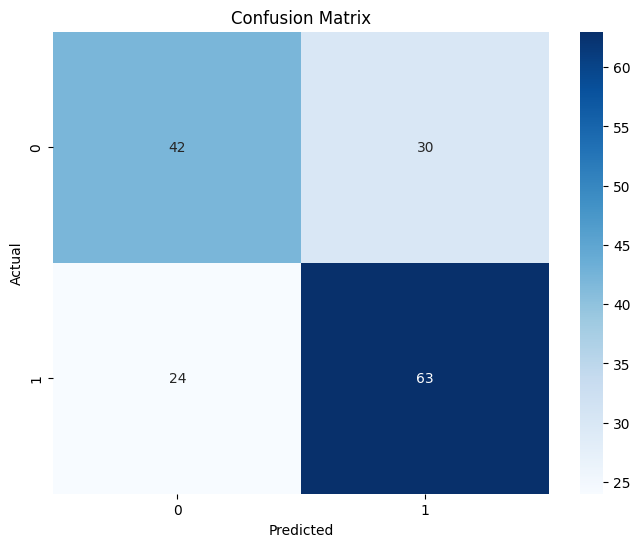

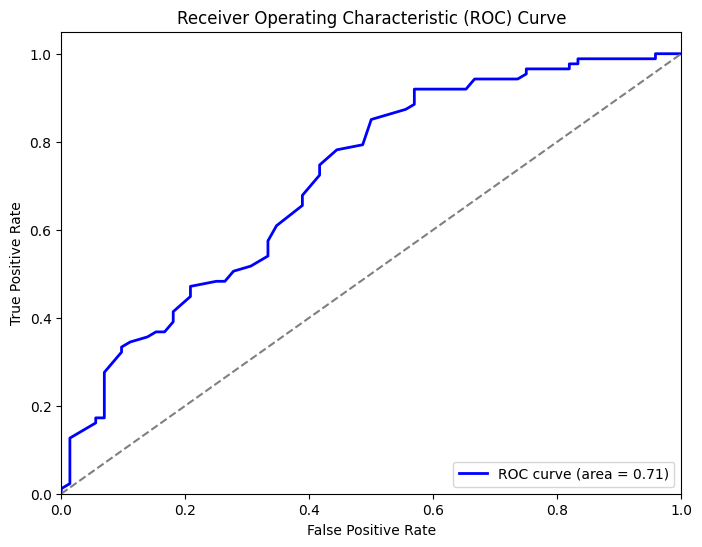

F1 score: 0.700


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GroupKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for the best window size (30 sec)
window_size = 30
df = pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{window_size}sec.csv")

# Blacklist of participants with missing data
blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]

# Prepare the data
df_filtered = df[~df['Participant'].isin(blacklist)]
X = df_filtered[['NumFix', 'AvgFixDur', 'NumBlink', 'AvgBlinkDur', 'AvgPupDia', 'VarPupDia', 'OffStimFram', 'AvgSacAmp', 'AvgFixDisp', 'LastFixDur', 'LastFixDurDiff']]
y = df_filtered['Attention']
groups = df_filtered['Participant']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=groups, random_state=42)

# Train the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the F1 score
print(f"F1 score: {f1_score(y_test, y_pred):.3f}")

**Try different machine learning models and plot their performance for different window sizes.**

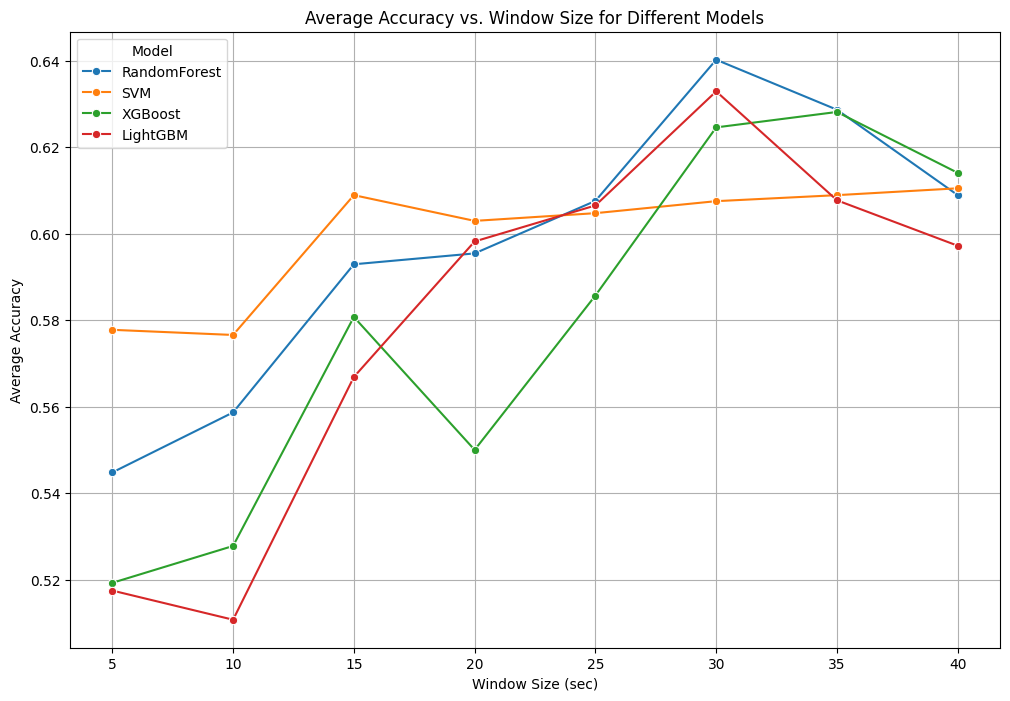

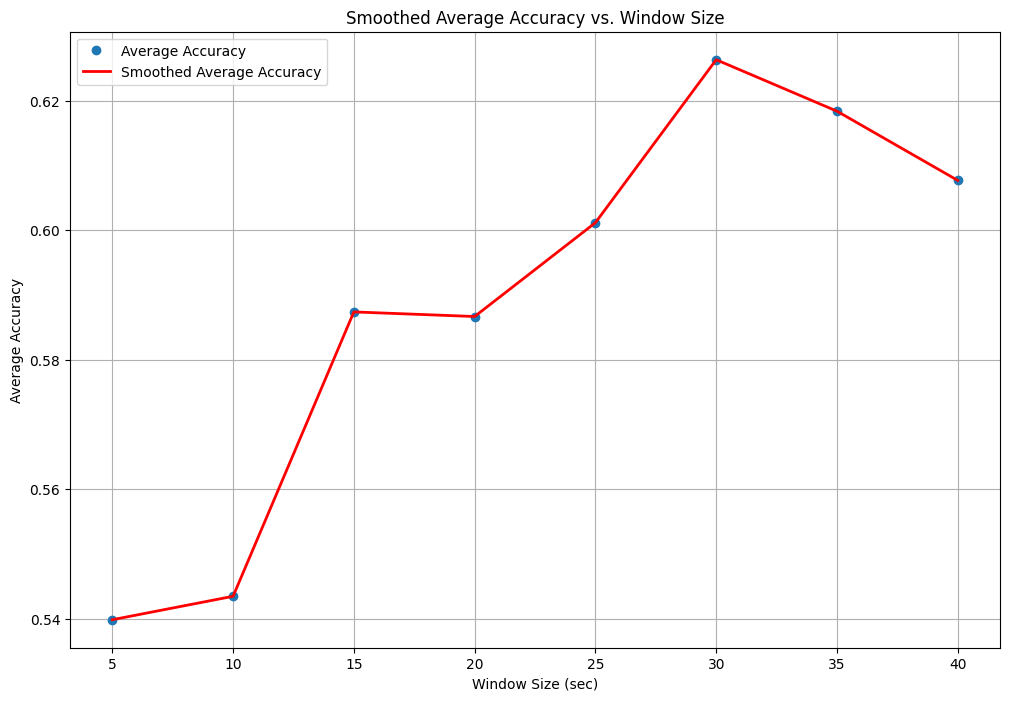

Overall Average Accuracies:
  Window size: 5 sec, Average accuracy: 0.540
  Window size: 10 sec, Average accuracy: 0.543
  Window size: 15 sec, Average accuracy: 0.587
  Window size: 20 sec, Average accuracy: 0.587
  Window size: 25 sec, Average accuracy: 0.601
  Window size: 30 sec, Average accuracy: 0.626
  Window size: 35 sec, Average accuracy: 0.618
  Window size: 40 sec, Average accuracy: 0.608
Best window size based on overall smoothed average accuracy: 30.0 sec


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load CSV files into DataFrames
window_sizes = [5 * i for i in range(1, 9)]
dataframes = [pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{w}sec.csv") for w in window_sizes]

blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]

# Function to prepare data by participant, excluding blacklist
def prepare_data(df):
    df_filtered = df[~df['Participant'].isin(blacklist)]
    X = df_filtered[['NumFix', 'AvgFixDur', 'NumBlink', 'AvgBlinkDur', 'AvgPupDia', 'VarPupDia', 'OffStimFram', 'AvgSacAmp', 'AvgFixDisp', 'LastFixDur', 'LastFixDurDiff']]
    y = df_filtered['Attention']
    groups = df_filtered['Participant']
    return X, y, groups

# Number of iterations and random states
iterations = 10
random_states = range(iterations)

# Models to evaluate
models = {
    'RandomForest': RandomForestClassifier,
    'SVM': SVC,
    'XGBoost': XGBClassifier,
    'LightGBM': lambda random_state: LGBMClassifier(random_state=random_state, verbose=-1)  # Suppress LightGBM warnings
}

# Loop through each DataFrame, model, and random state
results = {w: {model: [] for model in models} for w in window_sizes}
for w, df in zip(window_sizes, dataframes):
    X, y, groups = prepare_data(df)
    gkf = GroupKFold(n_splits=5)
    
    for model_name, model in models.items():
        for random_state in random_states:
            pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),
                ('classifier', model(random_state=random_state) if model_name not in ['SVM'] else model())
            ])
            accuracy_scores = cross_val_score(pipeline, X, y, groups=groups, cv=gkf)
            results[w][model_name].extend(accuracy_scores)

# Calculate average accuracy for each model and window size
average_results = {w: {model: np.mean(scores) for model, scores in models_scores.items()} for w, models_scores in results.items()}

# Convert average_results to a DataFrame for plotting
average_results_df = pd.DataFrame.from_dict(average_results, orient='index').reset_index().melt(id_vars='index')
average_results_df.columns = ['window_size', 'model', 'average_accuracy']

# Plot accuracy changes for all models
plt.figure(figsize=(12, 8))
sns.lineplot(x='window_size', y='average_accuracy', hue='model', data=average_results_df, marker='o')
plt.xlabel('Window Size (sec)')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. Window Size for Different Models')
plt.legend(title='Model')
plt.grid(True)
plt.show()

# Calculate overall average accuracy for each window size
overall_average_accuracy = {w: np.mean(list(models_scores.values())) for w, models_scores in average_results.items()}

# Convert overall_average_accuracy to a DataFrame for smoothing and plotting
overall_average_df = pd.DataFrame(list(overall_average_accuracy.items()), columns=['window_size', 'average_accuracy'])

# Smooth the curve using LOWESS
smoothed = lowess(overall_average_df['average_accuracy'], overall_average_df['window_size'], frac=0.3)

# Plot the smoothed curve of overall average accuracy
plt.figure(figsize=(12, 8))
plt.plot(overall_average_df['window_size'], overall_average_df['average_accuracy'], 'o', label='Average Accuracy')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='Smoothed Average Accuracy', linewidth=2)
plt.xlabel('Window Size (sec)')
plt.ylabel('Average Accuracy')
plt.title('Smoothed Average Accuracy vs. Window Size')
plt.legend()
plt.grid(True)
plt.show()

# Print overall average accuracies
print("Overall Average Accuracies:")
for w, avg_accuracy in overall_average_accuracy.items():
    print(f"  Window size: {w} sec, Average accuracy: {avg_accuracy:.3f}")

# Find the best window size based on smoothed curve
best_window_size = smoothed[np.argmax(smoothed[:, 1]), 0]
print(f"Best window size based on overall smoothed average accuracy: {best_window_size:.1f} sec")

## 3. Feature Importance

### 3.1 Check for Multicollinearity Using the Variance Inflation Factor (VIF)

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv')

# Remove blacklisted participants
blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]
df = df[~df['Participant'].isin(blacklist)]

# Define predictor variables (excluding categorical and target variables)
predictors = ['NumFix', 'AvgFixDur', 'NumBlink', 'AvgBlinkDur', 'AvgPupDia', 'VarPupDia', 
              'OffStimFram', 'AvgSacAmp', 'AvgFixDisp', 'LastFixDur', 'LastFixDurDiff']

# Drop rows with missing values
df_cleaned = df.dropna(subset=predictors + ['Attention'])

# Normalize the predictor variables
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df_cleaned[predictors])
X_normalized = pd.DataFrame(X_normalized, columns=predictors, index=df_cleaned.index)

# Define the target variable
y = df_cleaned['Attention']

# Calculate VIF for each predictor to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X_normalized.columns
vif_data["VIF"] = [variance_inflation_factor(X_normalized.values, i) for i in range(len(vif_data["feature"]))]
print("VIF Data before removing high multicollinearity variables:\n", vif_data)

VIF Data before removing high multicollinearity variables:
            feature           VIF
0           NumFix      2.999882
1        AvgFixDur   1326.286471
2         NumBlink      1.911854
3      AvgBlinkDur      2.457623
4        AvgPupDia      1.323203
5        VarPupDia      1.392463
6      OffStimFram      1.476413
7        AvgSacAmp      1.325823
8       AvgFixDisp      1.469374
9       LastFixDur  10532.621246
10  LastFixDurDiff  10308.669094


High VIF Values: VIF values greater than 10 indicate problematic levels of multicollinearity. 

The variables AvgFixDur, LastFixDur, and LastFixDurDiff far exceed this, suggesting that they are likely redundant given the other variables in the model.

We should remove those variables first and fit the logistic regression model.

In [25]:
# Drop variables with high VIF values to address multicollinearity
high_vif_cols = ['AvgFixDur', 'LastFixDur', 'LastFixDurDiff']
X_normalized_reduced = X_normalized.drop(columns=high_vif_cols)

# Add a constant to the model (intercept)
X_normalized_reduced = sm.add_constant(X_normalized_reduced)

# Fit a logistic regression model
logit_model_reduced = sm.Logit(y, X_normalized_reduced).fit()

# Display the summary of the reduced logistic regression model
print(logit_model_reduced.summary())

Optimization terminated successfully.
         Current function value: 0.623143
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attention   No. Observations:                  792
Model:                          Logit   Df Residuals:                      783
Method:                           MLE   Df Model:                            8
Date:                Mon, 20 May 2024   Pseudo R-squ.:                 0.09398
Time:                        17:53:15   Log-Likelihood:                -493.53
converged:                       True   LL-Null:                       -544.72
Covariance Type:            nonrobust   LLR p-value:                 1.391e-18
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2042      0.077      2.659      0.008       0.054       0.355
NumFix          0.5112    

**Summary of Logistic Regression Results:**
-   Likelihood Ratio Test p-value: 4.162e-19, indicating the model is statistically significant.
-   NumFix: 0.0424 (p < 0.001) - A significant positive relationship with attention, indicating more fixations are associated with focused attention.
-   AvgFixDisp: 5.8606 (p = 0.006) - A significant positive relationship, suggesting that higher average fixation dispersion is associated with focused attention.

### 3.2 Correlation Heatmap of extracted features

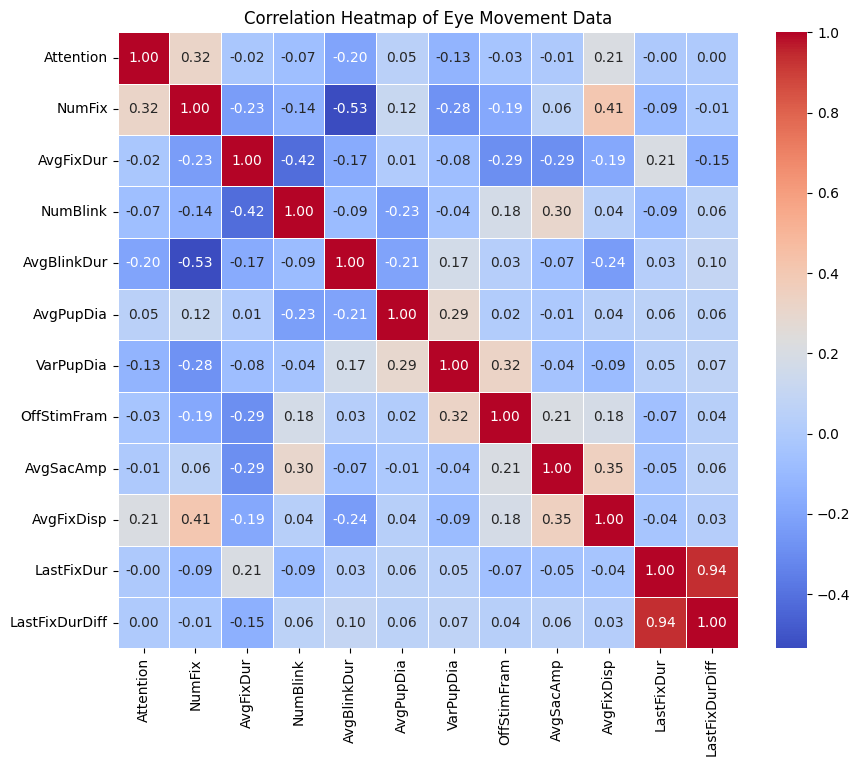

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv')
blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]
df = df[~df['Participant'].isin(blacklist)]
X = df[['Attention', 'NumFix', 'AvgFixDur', 'NumBlink', 'AvgBlinkDur', 'AvgPupDia', 'VarPupDia', 'OffStimFram', 'AvgSacAmp', 'AvgFixDisp', 'LastFixDur', 'LastFixDurDiff']]
# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Eye Movement Data")
plt.show()

### 3.3 Between-group variation and Within-group variation
一人ずつ固定します、彼らのFocus時とMW時のNumFixとAvgFixDispの平均を求めます。そうすると33個のデータを得ることができます。

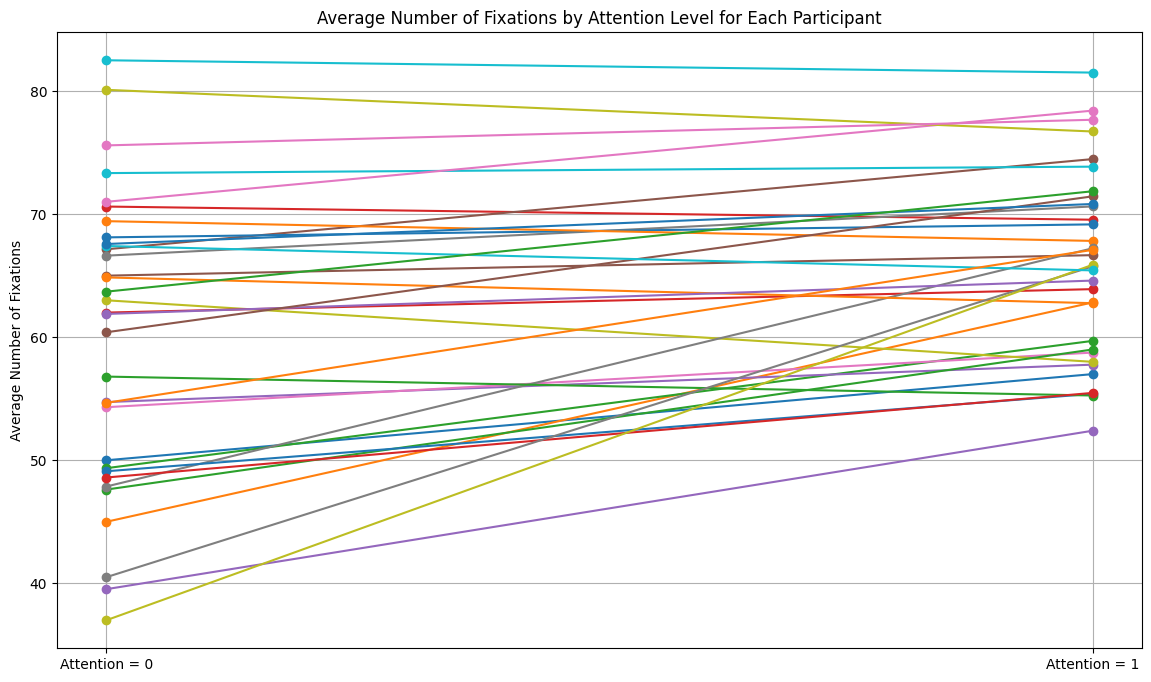

Participants with inclined lines are 25
Participants with declined lines are 8


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv'
df = pd.read_csv(file_path)
blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]
df = df[~df['Participant'].isin(blacklist)]

# Group by Participant and Attention, and calculate average NumFix
avg_numfix = df.groupby(['Participant', 'Attention'])['NumFix'].mean().unstack()

avg_numfix.reset_index(inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
for _, row in avg_numfix.iterrows():
    ax.plot([0, 1], [row[0], row[1]], marker='o', linestyle='-')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Attention = 0', 'Attention = 1'])
ax.set_ylabel('Average Number of Fixations')
ax.set_title('Average Number of Fixations by Attention Level for Each Participant')

# Analyze the trend (inclined if Attention 1 > Attention 0, otherwise declined)
trends = (avg_numfix[1] > avg_numfix[0]).value_counts()

# Display the trend count
inclined = trends.get(True, 0)
declined = trends.get(False, 0)

plt.grid(True)
plt.show()

print(f"Participants with inclined lines are {inclined}")
print(f"Participants with declined lines are {declined}")

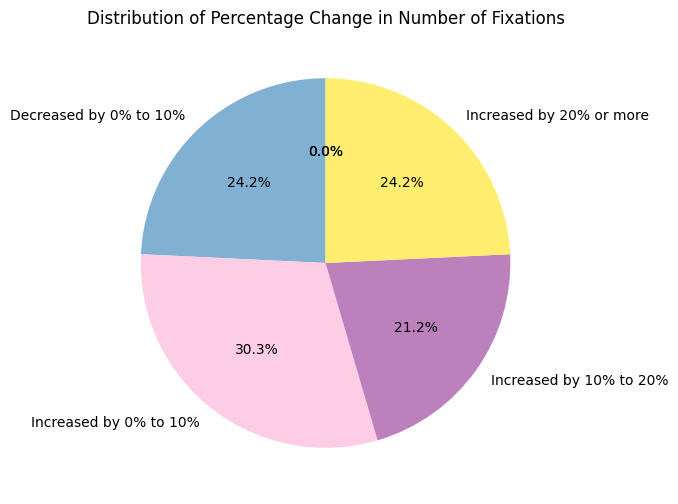

Participants with an increase of 20% or more in the number of fixations:
[1, 2, 12, 14, 17, 27, 28, 31]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming avg_numfix is your DataFrame with columns [0] for Attention=0 and [1] for Attention=1 already calculated
percentage_changes = ((avg_numfix[1] - avg_numfix[0]) / avg_numfix[0]) * 100

# Define bins for the categories
bins = [-float('inf'), -20, -10, 0, 10, 20, float('inf')]
labels = [
    'Decreased by 20% or more',
    'Decreased by 10% to 20%',
    'Decreased by 0% to 10%',
    'Increased by 0% to 10%',
    'Increased by 10% to 20%',
    'Increased by 20% or more'
]

# Categorize the percentage changes
categories = pd.cut(percentage_changes, bins, labels=labels, include_lowest=True, ordered=True)

# Count the number of participants in each bin
category_counts = categories.value_counts(sort=False)
category_counts_normalized = category_counts / category_counts.sum()

# Plotting
plt.figure(figsize=(10, 6))
category_counts_normalized.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap="Set3", labels=labels)
plt.ylabel('')  # Remove the y-label as it is unnecessary for pie charts
plt.title('Distribution of Percentage Change in Number of Fixations')
plt.show()

# Identify participants with an increase of 20% or more
increased_20_or_more = percentage_changes[percentage_changes > 20]
participants_increased_20_or_more = increased_20_or_more.index.tolist()

print("Participants with an increase of 20% or more in the number of fixations:")
print(participants_increased_20_or_more)

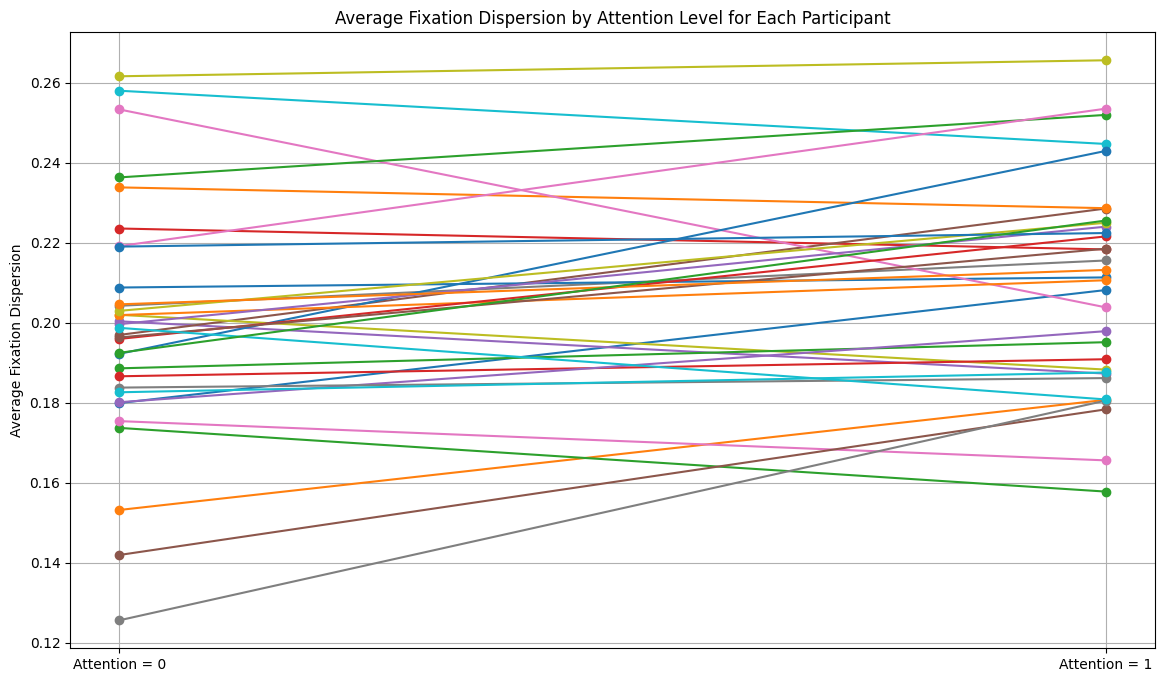

Participants with inclined lines are 24
Participants with declined lines are 9


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv'
df = pd.read_csv(file_path)
blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]
df = df[~df['Participant'].isin(blacklist)]

# Group by Participant and Attention, and calculate average AvgFixDisp
avg_fixdisp = df.groupby(['Participant', 'Attention'])['AvgFixDisp'].mean().unstack()

avg_fixdisp.reset_index(inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
for _, row in avg_fixdisp.iterrows():
    ax.plot([0, 1], [row[0], row[1]], marker='o', linestyle='-')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Attention = 0', 'Attention = 1'])
ax.set_ylabel('Average Fixation Dispersion')
ax.set_title('Average Fixation Dispersion by Attention Level for Each Participant')

# Analyze the trend (inclined if Attention 1 > Attention 0, otherwise declined)
trends = (avg_fixdisp[1] > avg_fixdisp[0]).value_counts()

# Display the trend count
inclined = trends.get(True, 0)
declined = trends.get(False, 0)

plt.grid(True)
plt.show()

print(f"Participants with inclined lines are {inclined}")
print(f"Participants with declined lines are {declined}")